In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

In [69]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [70]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [71]:
hour_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [72]:
day_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [73]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [74]:
hour_df.isnull().sum()
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


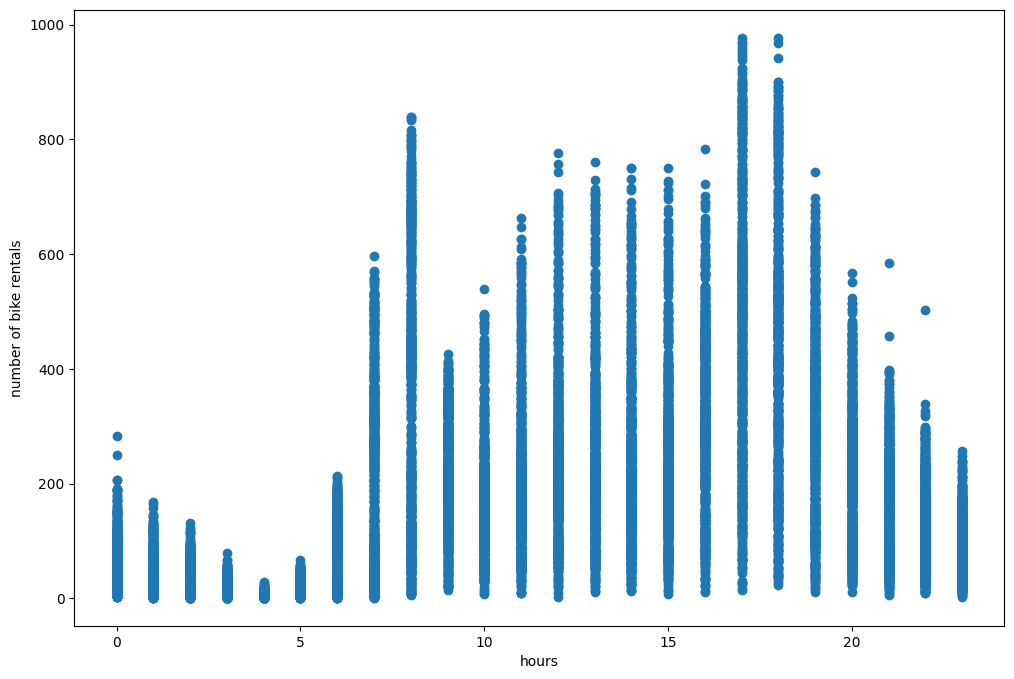

In [75]:
plt.figure(figsize = (12,8))
plt.plot(hour_df["hr"], hour_df["cnt"], "o")
plt.xlabel("hours")
plt.ylabel("number of bike rentals")
plt.show()

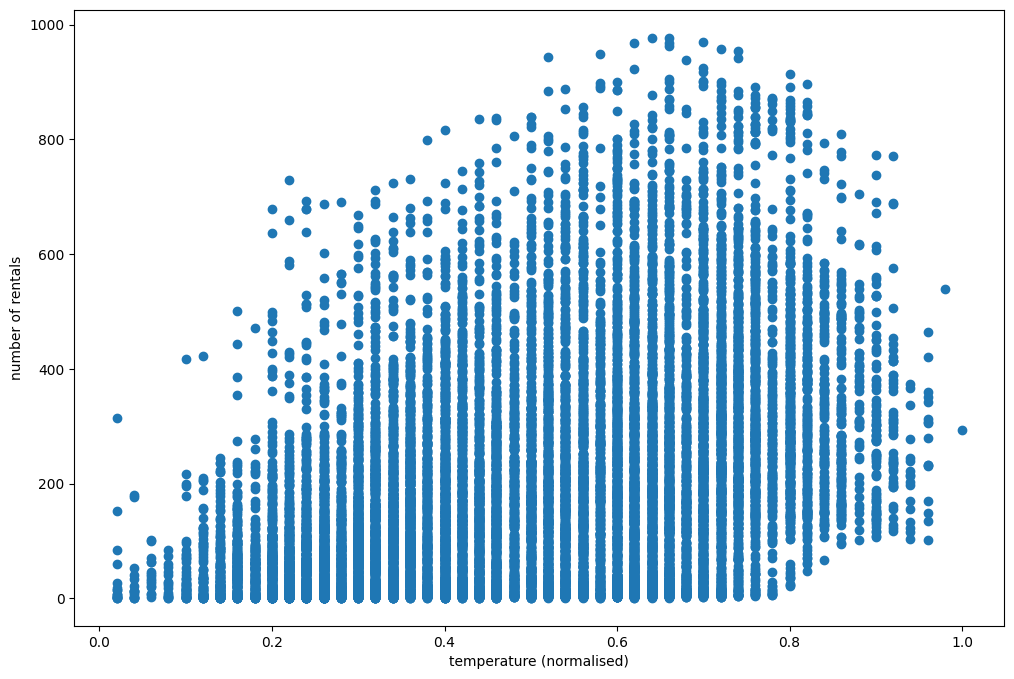

In [76]:
plt.figure(figsize = (12,8))
plt.scatter(hour_df["temp"], hour_df["cnt"])
plt.xlabel("temperature (normalised)")
plt.ylabel("number of rentals")
plt.show()

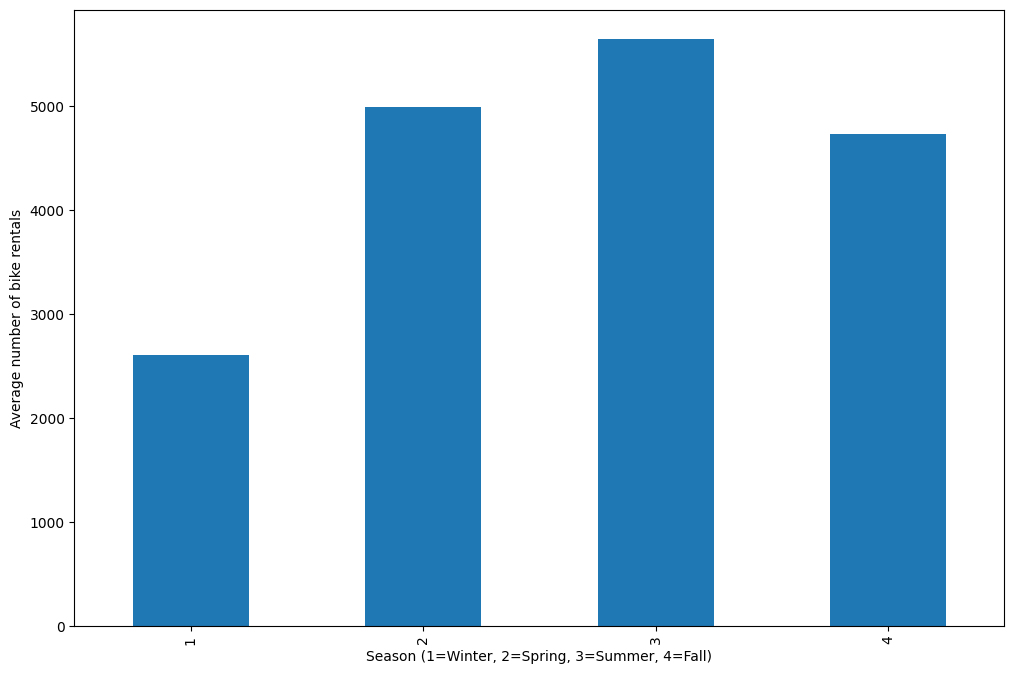

In [77]:
plt.figure(figsize=(12, 8))
season_avg = day_df.groupby("season")["cnt"].mean()
season_avg.plot(kind = "bar")
plt.xlabel("Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)")
plt.ylabel("Average number of bike rentals")
plt.show()

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
dteday        0.277753
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


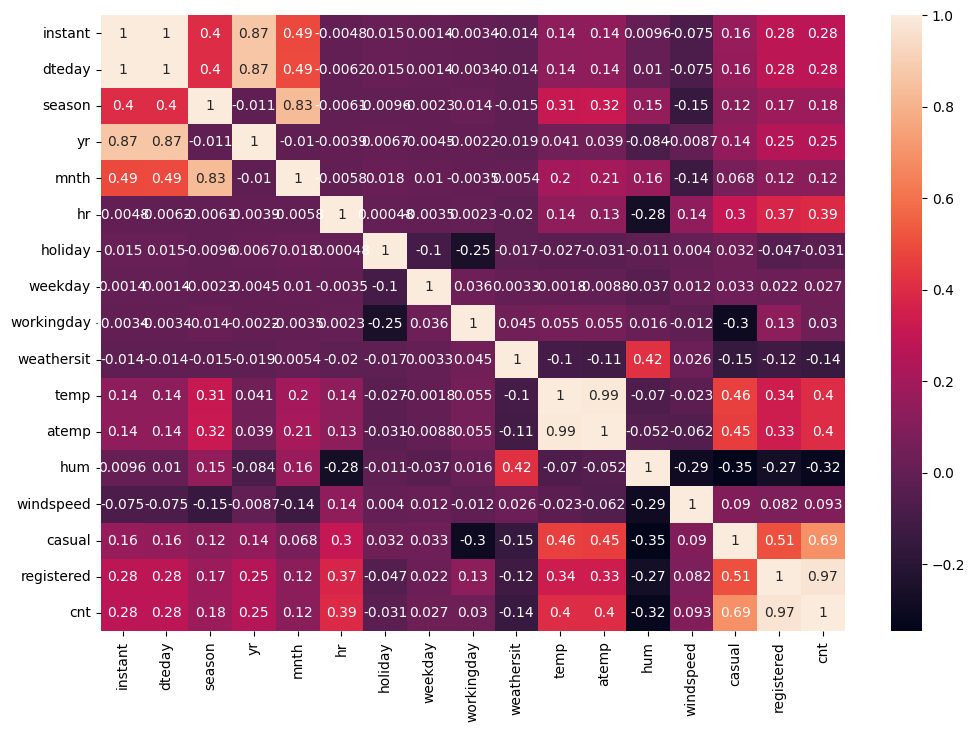

In [78]:
corelation = hour_df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corelation, annot = True)
print(corelation["cnt"].sort_values(ascending = False))

In [79]:
hour_df.drop(columns = ["registered", "casual", "atemp","yr", "season", "mnth", "windspeed", "workingday", "weekday","holiday","weathersit"], inplace=True)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
dteday        0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


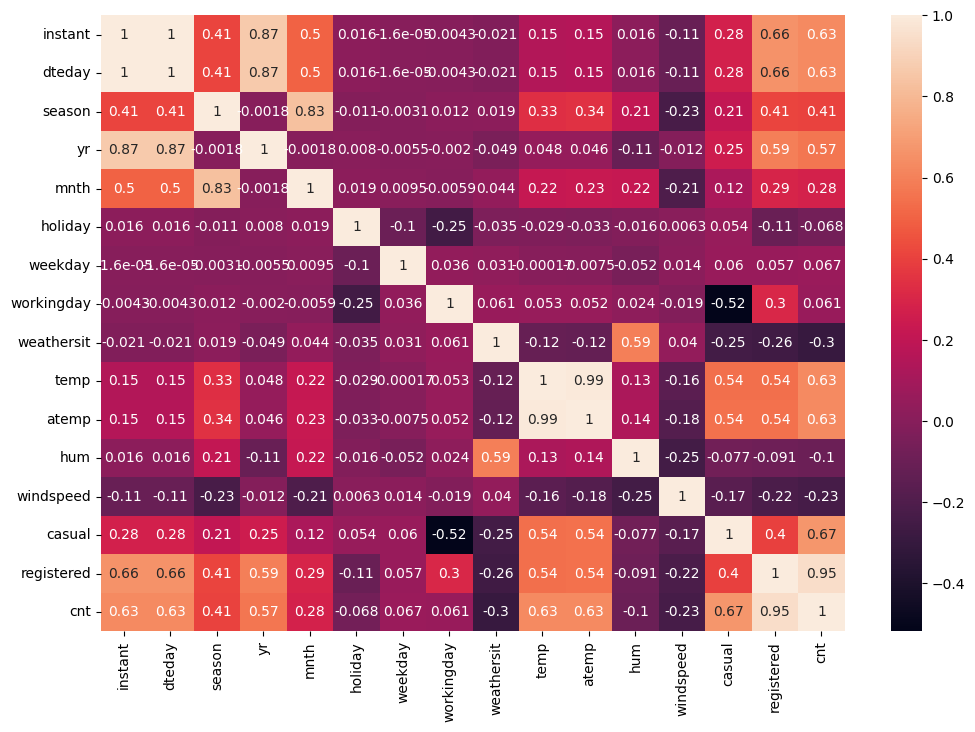

In [80]:
corelation = day_df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corelation, annot = True)
print(corelation["cnt"].sort_values(ascending = False))

In [81]:
day_df.drop(columns = ["registered", "casual","atemp","holiday", "workingday", "weekday", "hum"], inplace=True)

In [82]:
def entropy(y):
    class_counts = np.bincount(y)
    probabilities = class_counts / len(y)
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

def information_gain(X, y, feature_idx, threshold):
    left_idx = X[:, feature_idx] <= threshold
    right_idx = X[:, feature_idx] > threshold
    if len(left_idx) == 0 or len(right_idx) == 0:
        return 0
    n = len(y)
    n_left, n_right = len(y[left_idx]), len(y[right_idx])
    entropy_left = entropy(y[left_idx])
    entropy_right = entropy(y[right_idx])
    weighted_entropy = (n_left / n) * entropy_left + (n_right / n) * entropy_right
    return entropy(y) - weighted_entropy

class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def find_best_split(self, X, y):
        best_gain = 0
        best_split = None
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = information_gain(X, y, feature_idx, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_split = {
                        'feature_idx': feature_idx,
                        'threshold': threshold,
                        'gain': gain
                    }
        return best_split

    def build_tree(self, X, y, depth=0):
        # Stopping criteria
        if depth == self.max_depth or len(y) < self.min_samples_split or entropy(y) == 0:
            return np.bincount(y).argmax()

        # Find the best split
        best_split = self.find_best_split(X, y)
        if not best_split:
            return np.bincount(y).argmax()

        # Split the data
        left_idx = X[:, best_split["feature_idx"]] <= best_split["threshold"]
        right_idx = X[:, best_split["feature_idx"]] > best_split["threshold"]

        # Recursively build the tree
        left_branch = self.build_tree(X[left_idx], y[left_idx], depth + 1)
        right_branch = self.build_tree(X[right_idx], y[right_idx], depth + 1)

        return {
            'feature_idx': best_split['feature_idx'],
            'threshold': best_split['threshold'],
            'left_branch': left_branch,
            'right_branch': right_branch
        }

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_one(self, x, tree):
        if isinstance(tree, dict):
            if x[tree['feature_idx']] <= tree['threshold']:
                return self.predict_one(x, tree['left_branch'])
            else:
                return self.predict_one(x, tree['right_branch'])
        return tree

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

In [83]:
# Add demand_category column based on the mean of 'cnt'
hour_df["demand_category"] = np.where(hour_df["cnt"] > hour_df["cnt"].mean(), 1, 0)

X = hour_df.drop(columns=["cnt", "demand_category"])
y = hour_df["demand_category"]

# Split data into training and test sets
train_ratio = 0.8
train_size = int(train_ratio * len(X))
indices = np.random.permutation(len(X))
train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [84]:

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

model = DecisionTreeClassifierScratch(max_depth=5)
model.fit(X_train_np, y_train_np)


y_pred = model.predict(X_test_np)
accuracy = np.sum(y_pred == y_test_np) / len(y_test_np)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8311277330264673


In [85]:

day_df["demand_category"] = np.where(day_df["cnt"] > day_df["cnt"].mean(), 1, 0)

X = day_df.drop(columns=["cnt", "demand_category"])
y = day_df["demand_category"]

# Split data into training and test sets
train_ratio = 0.8
train_size = int(train_ratio * len(X))
indices = np.random.permutation(len(X))
train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [64]:
# Convert pandas DataFrames to numpy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

# Train the model
model = DecisionTreeClassifierScratch(max_depth=5)
model.fit(X_train_np, y_train_np)

# Make predictions
y_pred = model.predict(X_test_np)

# Calculate accuracy
accuracy = np.sum(y_pred == y_test_np) / len(y_test_np)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9591836734693877


# some extra analysis on data I did (took help of pre built kmeans and libraries)

In [88]:
from sklearn.preprocessing import StandardScaler
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")
# Select features for clustering
features = ['hr', 'temp', 'hum']
X = hour_df[features]

X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = 5, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

hour_df["demand_cluster"] = clusters

In [92]:
#average for each cluster
cluster_analysis = hour_df.groupby("demand_cluster")["cnt"].mean().reset_index()
print(cluster_analysis)

   demand_cluster         cnt
0               0  193.462424
1               1   82.635835
2               2  201.021407
3               3  120.743869
4               4  356.380163


In [93]:

low = 120
high = 250
def label_demand_type(avg_count):
    if avg_count < low:
        return "Low demand"
    elif avg_count <= high:
        return "Medium demand"
    else:
        return "High demand"

# Apply the function to categorize demand
cluster_analysis['demand_type'] = cluster_analysis['cnt'].apply(label_demand_type)
print(cluster_analysis)

   demand_cluster         cnt    demand_type
0               0  193.462424  Medium demand
1               1   82.635835     Low demand
2               2  201.021407  Medium demand
3               3  120.743869  Medium demand
4               4  356.380163    High demand


In [98]:

demand_type_mapping = cluster_analysis.set_index('demand_cluster')['demand_type'].to_dict()
color_map = {
    'Low demand': 'red',
    'Medium demand': 'orange',
    'High demand': 'green'
}
hour_df['demand_type'] = hour_df['demand_cluster'].map(demand_type_mapping)

hour of days vs demand type graph

<Figure size 1200x600 with 0 Axes>

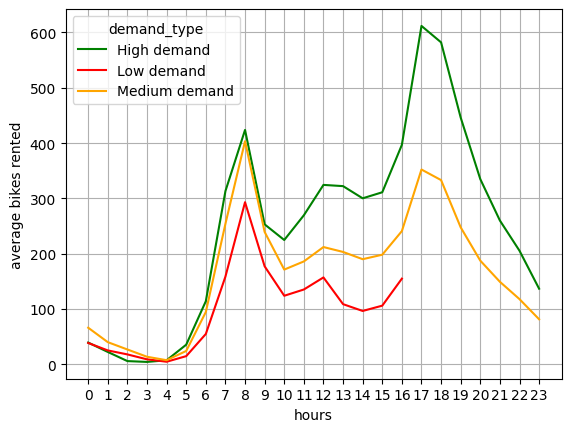

In [100]:
hourly_avg = hour_df.groupby(['hr', 'demand_type'])['cnt'].mean().unstack()

plt.figure(figsize=(12, 6))
hourly_avg.plot(kind="line", color=[color_map[d] for d in hourly_avg.columns])
plt.xlabel("hours")
plt.ylabel("average bikes rented")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

different humidity and temperatures vs rental demands

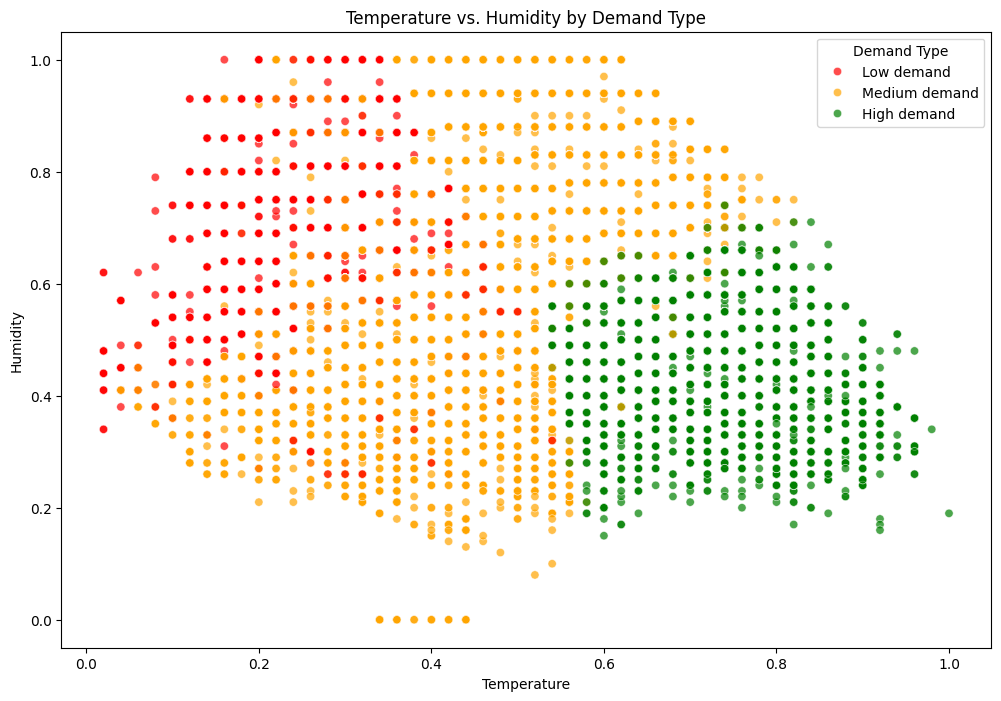

In [101]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=hour_df, x = "temp", y = "hum", hue = "demand_type", palette=color_map, alpha=0.7)
plt.xlabel("temp")
plt.ylabel("hum")
plt.show()